In [1]:
import os
from pathlib import Path
from IPython.display import Image, display
os.chdir("/Users/oliverdaniels-koch/projects/elk-experiments")
out_dir = Path("output")
device = "mps"

In [2]:
exp_dir = out_dir / "eap_supervised_probes"

In [3]:
from functools import partial

import torch 
import numpy as np

from elk_experiments.utils import train_detector_cache, get_activation_at_last_token
from elk_experiments.eap_detector import EAPDetector, effect_prob_func, set_model_hooks
from elk_experiments.tiny_natural_mechanisms_utils import get_task_subset

from cupbearer import tasks, utils
from cupbearer.detectors import SupervisedLinearProbe, ActivationCache
from cupbearer.tasks.tiny_natural_mechanisms import get_effect_tokens

In [4]:
class EAPSupervisedLinearProbe(EAPDetector, SupervisedLinearProbe):
    pass

In [5]:
task_name = "ifelse"
model_name = "pythia-70m"
task = tasks.tiny_natural_mechanisms(task_name, device, model_name)
set_model_hooks(task.model)

Loaded pretrained model attn-only-1l into HookedTransformer
Moving model to device:  mps


/Users/oliverdaniels-koch/Library/Caches/pypoetry/virtualenvs/elk-experiments-AZ2LBS3Q-py3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-70m into HookedTransformer
Moving model to device:  mps


In [6]:
small_task = get_task_subset(task, 2048, 1024, 1024, with_labels=True, split_untrusted=True)

In [7]:
effect_tokens = get_effect_tokens(task_name, small_task.model)

# Linear Probe on Attribution Scores

In [19]:
detector_dir = exp_dir / f"{task_name}_{model_name}_linear_split"

In [20]:
cache = ActivationCache(device)

In [21]:
detector = EAPSupervisedLinearProbe(
    scale_acts=True,
    effect_prob_func=partial(effect_prob_func, effect_tokens=effect_tokens),
    upstream_nodes=["head"],
    downstream_nodes=["head"],
    edge_filter=lambda x: True,
    layer_aggregation="mean", 
    cache=cache
)

  0%|          | 0/16 [00:00<?, ?it/s]/Users/oliverdaniels-koch/Library/Caches/pypoetry/virtualenvs/elk-experiments-AZ2LBS3Q-py3.10/lib/python3.10/site-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
100%|██████████| 16/16 [00:58<00:00,  3.65s/it]
/Users/oliverdaniels-koch/Library/Caches/pypoetry/virtualenvs/elk-experiments-AZ2LBS3Q-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

/Users/oliverdaniels-koch/Library/Caches/pypoetry/virtualenvs/elk-experiments-AZ2LBS3Q-py3.10/lib/python3.10/site-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/Users/oliverdaniels-koch/Library/Caches/pypoetry/virtualenvs/elk-experiments-AZ2LBS3Q-py3.10/lib/python3.10/site-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward

(defaultdict(dict,
             {'all': {'AUC_ROC': 0.9744873046875, 'AP': 0.9770435730451152}}),
 {'all': <Figure size 640x480 with 1 Axes>})

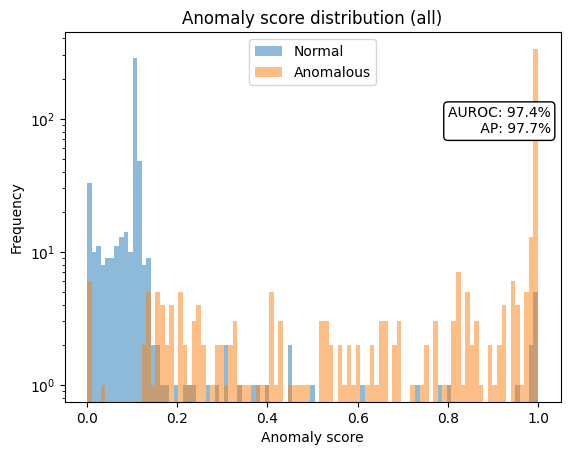

In [22]:
train_detector_cache(
    detector_dir=detector_dir,
    detector=detector,
    task=small_task,
    batch_size=64,
    eval_batch_size=64,
    cache=cache,
    overwrite=True
)

# Linear Probe on Activations

In [8]:
detector_dir = exp_dir / f"{task_name}_{model_name}_attention_activations_linear_split"

In [13]:
for name, _ in task.model.named_modules():
    print(name)


embed
hook_embed
blocks
blocks.0
blocks.0.ln1
blocks.0.ln1.hook_scale
blocks.0.ln1.hook_normalized
blocks.0.ln2
blocks.0.ln2.hook_scale
blocks.0.ln2.hook_normalized
blocks.0.attn
blocks.0.attn.hook_k
blocks.0.attn.hook_q
blocks.0.attn.hook_v
blocks.0.attn.hook_z
blocks.0.attn.hook_attn_scores
blocks.0.attn.hook_pattern
blocks.0.attn.hook_result
blocks.0.attn.hook_rot_k
blocks.0.attn.hook_rot_q
blocks.0.mlp
blocks.0.mlp.hook_pre
blocks.0.mlp.hook_post
blocks.0.hook_attn_in
blocks.0.hook_q_input
blocks.0.hook_k_input
blocks.0.hook_v_input
blocks.0.hook_mlp_in
blocks.0.hook_attn_out
blocks.0.hook_mlp_out
blocks.0.hook_resid_pre
blocks.0.hook_resid_post
blocks.1
blocks.1.ln1
blocks.1.ln1.hook_scale
blocks.1.ln1.hook_normalized
blocks.1.ln2
blocks.1.ln2.hook_scale
blocks.1.ln2.hook_normalized
blocks.1.attn
blocks.1.attn.hook_k
blocks.1.attn.hook_q
blocks.1.attn.hook_v
blocks.1.attn.hook_z
blocks.1.attn.hook_attn_scores
blocks.1.attn.hook_pattern
blocks.1.attn.hook_result
blocks.1.attn.hook

In [14]:
names = [
    # "hook_embed.output",
    # "blocks.0.hook_attn_out.output",
    # "blocks.1.hook_attn_out.output",
    # "blocks.2.hook_attn_out.output",
    # "blocks.3.hook_attn_out.output",
    # "blocks.4.hook_attn_out.output",
    # "blocks.0.attn.hook_attn_scores.output",
    # "blocks.0.attn.hook_q.output",
    "ln_final.hook_normalized.output",
]

In [15]:
detector = SupervisedLinearProbe(
    activation_names=names, 
    activation_processing_func=get_activation_at_last_token,
)

100%|██████████| 16/16 [00:01<00:00,  8.14it/s]
2024-07-03 15:34:56.028 | INFO     | cupbearer.detectors.anomaly_detector:save_weights:257 - Saving detector to output/eap_supervised_probes/ifelse_pythia-70m_attention_activations_linear_split/detector


Evaluating:   0%|          | 0/16 [00:00<?, ?it/s]

2024-07-03 15:34:57.984 | INFO     | cupbearer.detectors.anomaly_detector:eval:152 - AUC_ROC (all): 1.0000
2024-07-03 15:34:57.986 | INFO     | cupbearer.detectors.anomaly_detector:eval:153 - AP (all): 1.0000


(defaultdict(dict,
             {'all': {'AUC_ROC': 0.9999923706054688,
               'AP': 0.9999924002918288}}),
 {'all': <Figure size 640x480 with 1 Axes>})

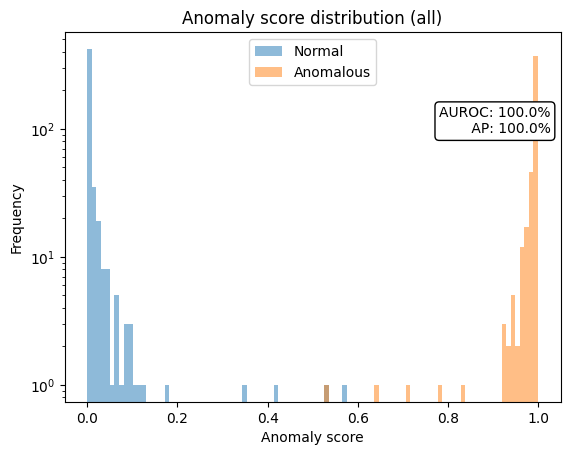

In [16]:
train_detector_cache(
    detector_dir=detector_dir,
    detector=detector,
    task=small_task,
    batch_size=64,
    eval_batch_size=64,
    cache=None,
    overwrite=True
)

# Mahalanobis on final layer

# Quadratic SemiDefinite Probe on Attribution Scores

# SVM Kernel methods on Second Order Expansion